epoch,train_loss,valid_loss,accuracy,time
0,3.267832,2.690695,0.150350,00:13
1,2.916131,2.088545,0.272727,00:13
2,2.513860,1.843485,0.346154,00:14
3,2.208856,1.707397,0.374126,00:14
4,1.995667,1.664785,0.381119,00:14


epoch,train_loss,valid_loss,accuracy,time
0,1.415220,1.611626,0.398601,00:17
1,1.327954,1.479942,0.479021,00:17
2,1.166157,1.460529,0.444056,00:17
3,1.032815,1.449867,0.465035,00:17
4,0.948419,1.428721,0.486014,00:17


epoch,train_loss,valid_loss,accuracy,time
0,0.676196,1.392191,0.489510,00:17
1,0.613497,1.364400,0.520979,00:17
2,0.539064,1.332190,0.538462,00:17
3,0.486611,1.320780,0.531469,00:17
4,0.446287,1.308667,0.538462,00:17


epoch,train_loss,valid_loss,accuracy,time
0,0.311430,1.302271,0.538462,00:17
1,0.289643,1.327988,0.527972,00:17
2,0.263085,1.299058,0.559441,00:17
3,0.238556,1.291233,0.555944,00:17
4,0.220970,1.282514,0.559441,00:17


epoch,train_loss,valid_loss,accuracy,time
0,0.180381,1.280324,0.555944,00:15
1,0.177948,1.281925,0.566434,00:14
2,0.165601,1.282857,0.566434,00:14
3,0.161427,1.284124,0.566434,00:14
4,0.157409,1.278254,0.566434,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.137295,1.279441,0.583916,00:17
1,0.146954,1.329116,0.559441,00:17
2,0.141639,1.335529,0.569930,00:17
3,0.136647,1.326074,0.590909,00:17
4,0.126118,1.307096,0.608392,00:17


epoch,train_loss,valid_loss,accuracy,time
0,0.114758,1.293412,0.601399,00:18
1,0.102030,1.303145,0.608392,00:17
2,0.088010,1.286588,0.604895,00:17
3,0.079812,1.277362,0.597902,00:17
4,0.075604,1.280002,0.597902,00:16


epoch,train_loss,valid_loss,accuracy,time
0,0.056640,1.277527,0.594406,00:16
1,0.053627,1.277970,0.597902,00:17
2,0.052322,1.279372,0.601399,00:17
3,0.054218,1.279960,0.601399,00:18
4,0.056117,1.283678,0.601399,00:18


epoch,train_loss,valid_loss,accuracy,time
0,0.053354,1.330590,0.580420,00:17
1,0.046916,1.332314,0.580420,00:17
2,0.044362,1.297639,0.566434,00:16


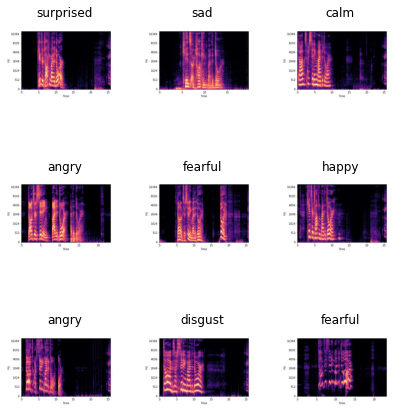

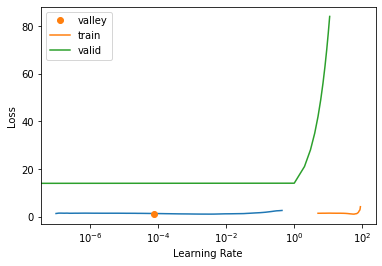

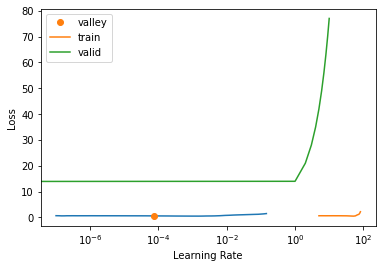

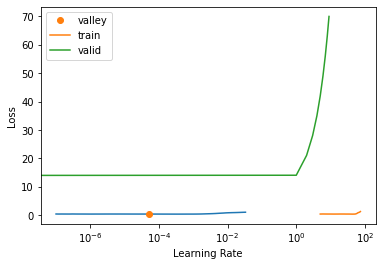

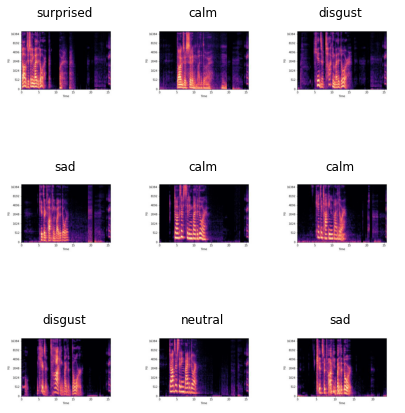

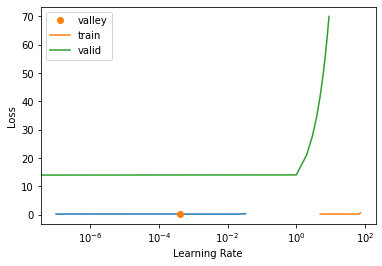

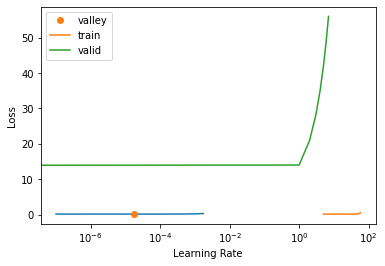

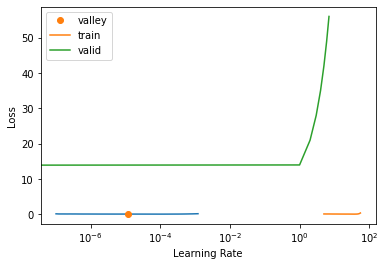

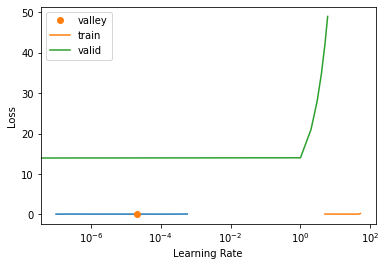

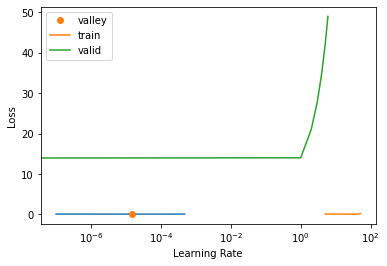

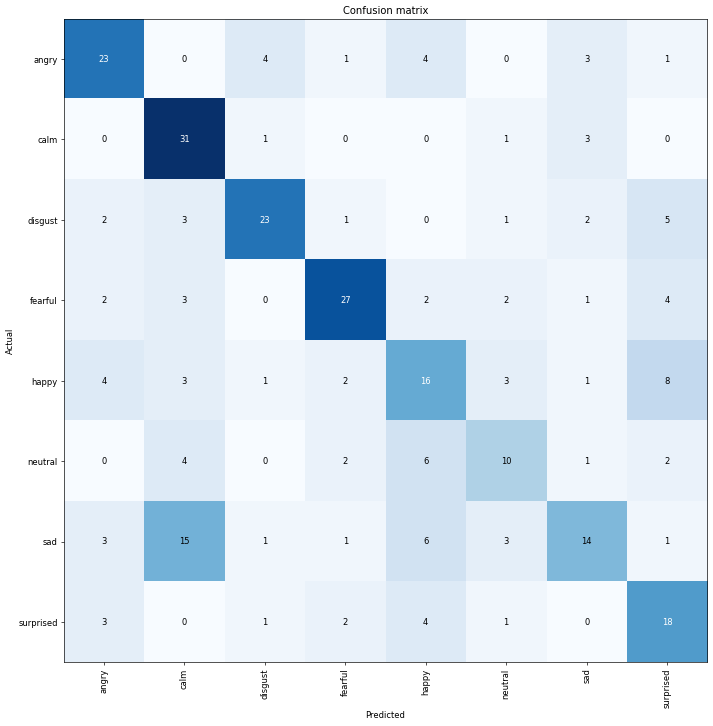

In [ ]:
from pathlib import Path
from fastai.vision import *
from fastai import *
from fastai.vision.data import ImageDataLoaders
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import re
import os
from fastai.vision.all import *
from fastai.text.all import *
from fastai.collab import *
from fastai.tabular.all import *



def plot(recorder, skip_start=5, with_valid=True):
        plt.plot(list(range(skip_start, len(recorder.losses))), recorder.losses[skip_start:], label='train')
        if with_valid:
            idx = (np.array(recorder.iters)<skip_start).sum()
            valid_col = recorder.metric_names.index('valid_loss') - 1 
            plt.plot(recorder.iters[idx:], label='valid')
            plt.legend()

path = '/content/drive/My Drive/CS124H/sorted_data'
#replace with whatever path your folders are saved one 
#and replace folder name
#if working locally, might be able to just put folder name
#and not the path as long as the folder is in the same directory
#as the notebook/file you're running


tfms = aug_transforms(do_flip = False, flip_vert = False, max_lighting = 0.1, max_zoom = 1.05, max_warp = 0., max_rotate = 5)
np.random.seed(42)
data = ImageDataLoaders.from_folder(path, train = ".", valid_pct = 0.2,
        ds_tfms = tfms, bs = 144, num_workers = 4)


data.show_batch(nrows = 3, figsize = (7, 8))

learn = vision_learner(data, models.resnet34, metrics = accuracy)
learn.fit_one_cycle(5)
learn.unfreeze()
learn.lr_find()
plot(learn.recorder, skip_start = 5, with_valid = True)
learn.fit_one_cycle(5, lr_max = slice(1e-5, 1e-4))
learn.lr_find()
plot(learn.recorder, skip_start = 5, with_valid = True)
learn.fit_one_cycle(5, lr_max = slice(1e-5, 1e-4))
learn.lr_find()
plot(learn.recorder, skip_start = 5, with_valid = True)
learn.fit_one_cycle(5, lr_max = slice(1e-5, 1e-4))

np.random.seed(42)
data = ImageDataLoaders.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=tfms, size=288, num_workers=4)
data.batch_size=25

learn.data = data
data.train_ds[0][0].shape


data.show_batch(nrows = 3, figsize = (7, 8))

learn.freeze()
learn.lr_find()
plot(learn.recorder, skip_start = 5, with_valid = True)
learn.fit_one_cycle(5, lr_max = slice(1e-4))
learn.unfreeze()
learn.lr_find()
plot(learn.recorder, skip_start = 5, with_valid = True)
learn.fit_one_cycle(5, lr_max = slice(1e-5,1e-4))
learn.lr_find()
plot(learn.recorder, skip_start = 5, with_valid = True)
learn.fit_one_cycle(5, lr_max = slice(1e-4))
learn.lr_find()
plot(learn.recorder, skip_start = 5, with_valid = True)
learn.fit_one_cycle(5, lr_max = slice(1e-5))
learn.lr_find()
plot(learn.recorder, skip_start = 5, with_valid = True)
learn.fit_one_cycle(3, lr_max = slice(1e-5,1e-4))

interp = ClassificationInterpretation.from_learner(learn)

losses, idxs = interp.top_losses()

len(data.valid_ds) == len(losses) == len(idxs)

interp.plot_confusion_matrix(figsize = (12, 12), dpi = 60)



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
